In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [41]:
def mcol(v):
    return v.reshape((v.size, 1))

def load_iris(filename):

    hlabels = {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2 
    }

    datalist = []
    labellist = []

    with open(filename, 'r') as file:
        for line in file:
            line = line.split(",")
            name = line[-1].strip()
            label = hlabels[name]
            attrs = mcol(np.array([float(i) for i in line[:-1]]))
            datalist.append(attrs)
            labellist.append(label)

    return np.hstack(datalist), np.array(labellist, dtype=np.int32)

def plot_scatter(D, L):
    
    D0 = D[:, L==0]
    D1 = D[:, L==1]
    D2 = D[:, L==2]

    hFea = {
        0: 'Sepal length',
        1: 'Sepal width',
        2: 'Petal length',
        3: 'Petal width'
        }

    
    plt.figure()
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.scatter(D0[0, :], D0[1, :], label = 'Setosa')
    plt.scatter(D1[0, :], D1[1, :], label = 'Versicolor')
    plt.scatter(D2[0, :], D2[1, :], label = 'Virginica')

    plt.legend()
    plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
    #plt.savefig(folder + '/scatter_%d_%d.pdf' % (dIdx1, dIdx2))
    plt.show()

In [7]:
D, L = load_iris('../data/iris.csv')

In [21]:

#compute mean of the dataset
mu = D.mean(axis=1).reshape((mu.size, 1))
#center the data
DC = D - mu
mu


array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

Compute the covariance matric **C** as:

$C = \dfrac{1}{N} D_c D_C^T$



In [24]:
C = np.dot(DC,DC.T) / float(DC.shape[1])
C

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

Once we have computed the data covariance matrix, we need to compute its eigenvectors and eigen-
values.

In [26]:
s, U = np.linalg.eigh(C)
s

array([0.02367619, 0.0776881 , 0.24105294, 4.20005343])

The m leading eigenvectors can be
retrieved from U (here we also reverse the order of the columns of U so that the leading eigenvectors are in the frst m columns)

In [30]:
m = 2
P = U[:, ::-1][:, 0:m]
P

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

Since the covariance matrix is semi-denite positive, we can also get the sorted eigenvectors from the Singular Value Decomposition.

$ C = U \Sigma V^T $

In fatc, in this case $V^T = U^T $, thus $U \Sigma V^T = U \Sigma U^T$ is also an eigen-decomposition of $C$ 


In [31]:
U, s, Vh = np.linalg.svd(C)

In [32]:
P = U[:, 0:m]

Finally, we can apply the projection to a single point x or to a matrix of samples D as:

In [40]:
#y = np.dot(P.T, x)
DP = np.dot(P.T, DC)
DP.shape

(2, 150)

As we can se the classes present some zone where the point are overllapped

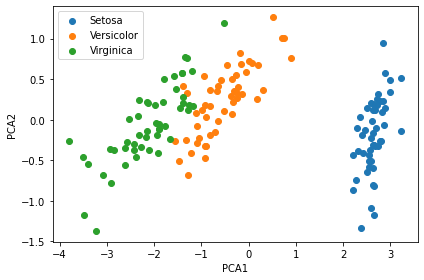

In [42]:
plot_scatter(DP, L)